## Setup

In [1]:
!pip install poetry

In [2]:
!pip install https://github.com/parulsethi/SMorph/releases/download/0.1.0/SMorph-0.1.0.tar.gz

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import smorph as sm
import skimage
import matplotlib.pyplot as plt

In [5]:
def plot(img):
    plt.imshow(img)
    plt.show()

## Start single cell analysis

In [6]:
# path to a cell image (relative to Smorph folder) 
cell_image = skimage.io.imread("autocropped/SW 1SEC2 CA1 A CONTRA_MIP/cell101-19,67,470,605,398,571.tif")

In [7]:
astrocyte = sm.Cell(cell_image, image_type='confocal', crop_tech='auto')

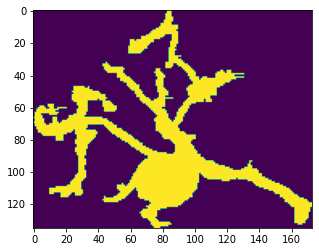

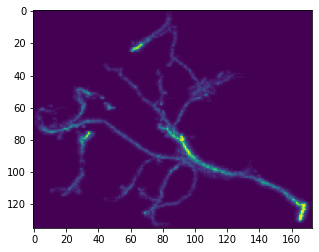

In [8]:
plot(astrocyte.cleaned_image)
plot(astrocyte.image)

In [9]:
astrocyte.features

{'surface_area': 4889,
 'total_length': 696,
 'avg_process_thickness': 7.0,
 'convex_hull': 14481,
 'no_of_forks': 26,
 'no_of_primary_branches': 4,
 'no_of_secondary_branches': 7,
 'no_of_tertiary_branches': 10,
 'no_of_quatenary_branches': 36,
 'no_of_terminal_branches': 33,
 'avg_length_of_primary_branches': 12.8,
 'avg_length_of_secondary_branches': 15.4,
 'avg_length_of_tertiary_branches': 15.6,
 'avg_length_of_quatenary_branches': 10.2,
 'avg_length_of_terminal_branches': 7.7,
 'critical_radius': 51,
 'critical_value': 8.76,
 'enclosing_radius': 90,
 'ramification_index': 2.19,
 'skewness': -0.12,
 'coefficient_of_determination': 0.78,
 'sholl_regression_coefficient': 0.03,
 'regression_intercept': -2.48}

In [10]:
astrocyte.features['surface_area']

4889

## Skeleton Analysis

In [11]:
# Sum of highlighted pixels is calculated to get the skeleton area estimate
astrocyte.features['total_length']

696

In [12]:
# Sum of highlighted pixels is calculated to get the area estimate of astrocyte
astrocyte.features['avg_process_thickness']

7.0

14481

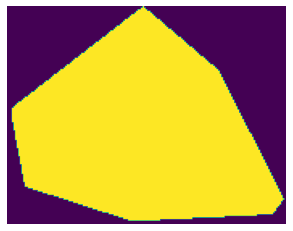

In [13]:
# Sum of pixels included in the smallest convex polygon that surround all astrocyte pixels
astrocyte.plot_convex_hull()
astrocyte.features['convex_hull']

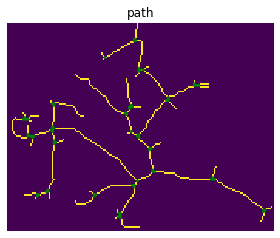

26

In [14]:
# Count all the bifurcation points
astrocyte.plot_forks()
astrocyte.features['no_of_forks']

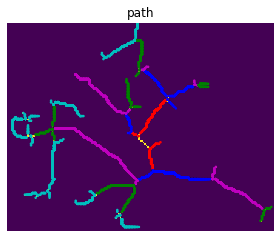

In [15]:
# The branches are differentiated into primary, secondary and further levels to compare any branch level differences between astrocytes
astrocyte.plot_branching_structure()

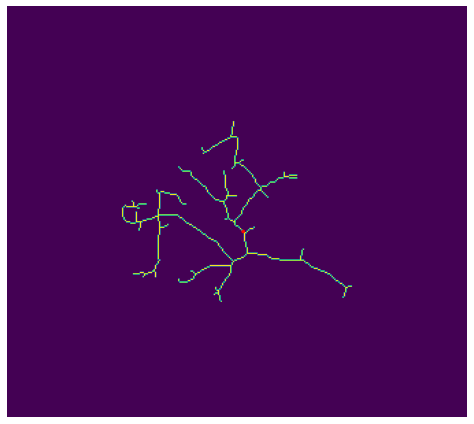

In [16]:
ax = plt.subplots(figsize=(10, 6))[1]
ax.imshow(astrocyte._padded_skeleton)

# overlay soma on skeleton
y, x = astrocyte._pad_sk_soma
c = plt.Circle((x, y), 1, color='r', alpha=.9)
ax.add_patch(c)
ax.set_axis_off()
plt.tight_layout()
plt.show()

## Sholl Analysis

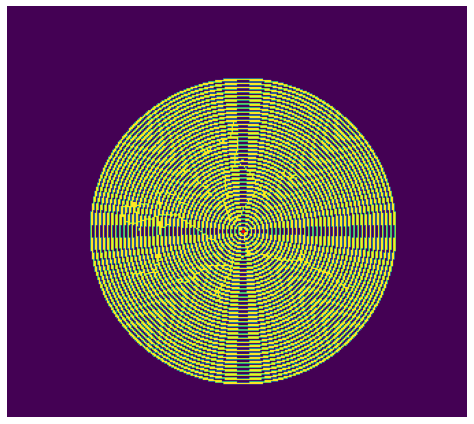

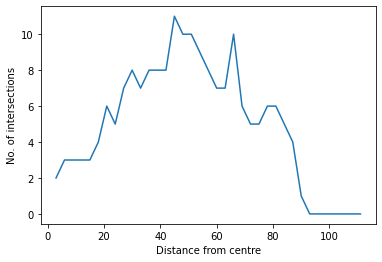

In [17]:
# Number of intersections of astrocytic branches at regular distances from the soma
astrocyte.plot_sholl_results()

Polynomial regression is used to mitigate the influence of local variations in the sampled data, and thereby better describe the relationship between intersections vs. distance

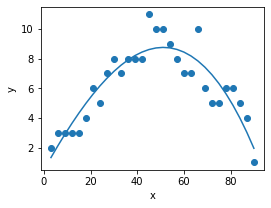

In [18]:
astrocyte.plot_polynomial_fit()

In [19]:
# Distance at which Critical value occurs (distance at which the Highest count of intersections occurred)
astrocyte.features['critical_radius']

51

In [20]:
# # Local maximum of the polynomial fit (Maximum no. of intersections)
astrocyte.features['critical_value']

8.76

In [21]:
# The last (thus, the widest) of intersecting radii to be associated with the number of intersections
astrocyte.features['enclosing_radius']

90

In [22]:
# Indication of how symmetrical the distribution is around its mean
astrocyte.features['skewness']

-0.12

In [23]:
# Ratio between critical value and number of primary branches
astrocyte.features['ramification_index']

2.19

In [24]:
# how close the data are to the fitted regression (indicative of the level of explained variability in the data set)
astrocyte.features['coefficient_of_determination']

0.78

In [25]:
# Rate of decay of no. of branches
astrocyte.features['sholl_regression_coefficient']

0.03

In [26]:
# Y intercept of the logarithmic plot
astrocyte.features['regression_intercept']

-2.48